In [1]:
import numpy as np
import time
from PySDM import Formulae
from PySDM.physics.constants import si
from PySDM.backends import CPU
from PySDM_examples.Luettmer_homogeneous_freezing.simulation import Simulation
from PySDM_examples.Luettmer_homogeneous_freezing.settings import Settings
from PySDM_examples.Luettmer_homogeneous_freezing import plot
from importlib import reload
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot


In [3]:
"""  basic setup for homogeneous freezing of pure-liquid droplets """

formulae = Formulae(
    particle_shape_and_density="MixedPhaseSpheres",
)

def run_simulations(setting):

        simulation = { "settings": setting,
                       "ensemble_member_outputs": [],
                       }
        for n in range(setting["number_of_ensemble_runs"]):
            model_setup = Settings(**simulation["settings"])
            model_setup.formulae.seed += 1
            model = Simulation(model_setup)
            simulation["ensemble_member_outputs"].append( model.run() )

        return simulation

standard = {  "n_sd": 100,
    "w_updraft": 1 * si.meter / si.second,
    "T0": formulae.trivia.C2K(-30),
    "dz": 1 * si.meter,
    "N_dv_droplet_distribution":  850 / si.cm**3,
    "r_mean_droplet_distribution": 15 * si.nanometer,
    "type_droplet_distribution": "monodisperse",
    "RH_0":0.995,
    "p0": 500 * si.hectopascals,
    "condensation_enable": True,
    "deposition_enable": True,
    "deposition_adaptive": True,
    "number_of_ensemble_runs": 1,
            }

backends = {
   "threshold": CPU(formulae = Formulae(
        particle_shape_and_density="MixedPhaseSpheres",
        homogeneous_ice_nucleation_rate="Null",
        saturation_vapour_pressure="MurphyKoop2005",
        seed=time.time_ns(),
    )),
    "KoopMurray2016": CPU(formulae = Formulae(
        particle_shape_and_density="MixedPhaseSpheres",
        homogeneous_ice_nucleation_rate="KoopMurray2016",
        saturation_vapour_pressure="MurphyKoop2005",
        seed=time.time_ns(),
    )),
   "Koop_Correction": CPU(formulae = Formulae(
        particle_shape_and_density="MixedPhaseSpheres",
        homogeneous_ice_nucleation_rate="Koop_Correction",
        saturation_vapour_pressure="MurphyKoop2005",
        seed=time.time_ns(),
    )),
    "Koop2000": CPU(formulae = Formulae(
        particle_shape_and_density="MixedPhaseSpheres",
        homogeneous_ice_nucleation_rate="Koop2000",
        saturation_vapour_pressure="MurphyKoop2005",
        seed=time.time_ns(),
    )),
}

hom_freezing_types =[  "KoopMurray2016", "Koop_Correction", "Koop2000"  ]


Setting up simulation for Koop_Correction with wpdraft=1.0 and n_sd=1000 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated


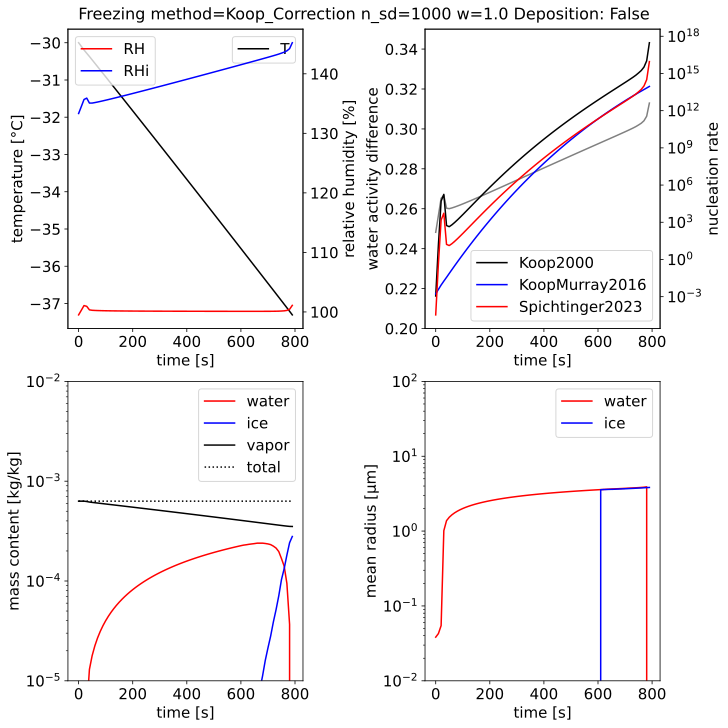

Setting up simulation for Koop_Correction with wpdraft=1.0 and n_sd=1000 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated


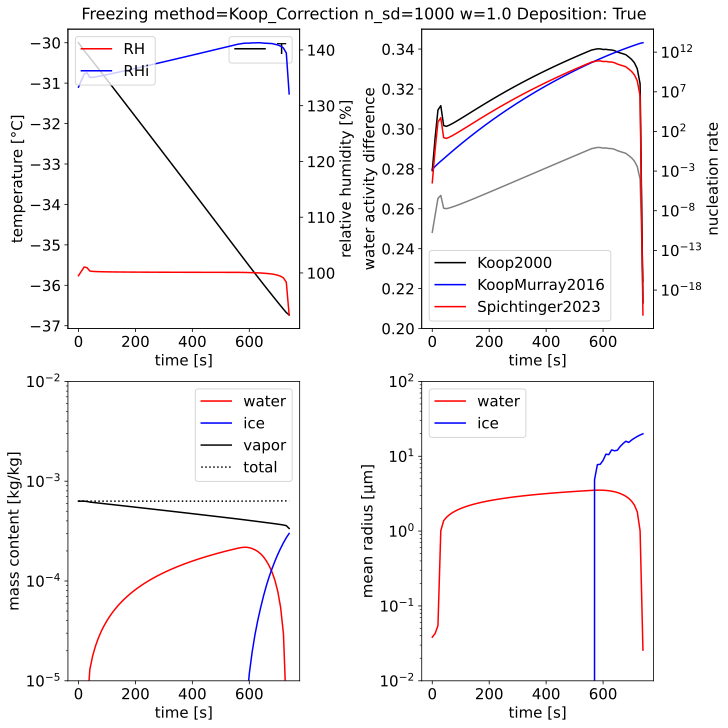

Setting up simulation for Koop_Correction with wpdraft=1.0 and n_sd=1000 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated


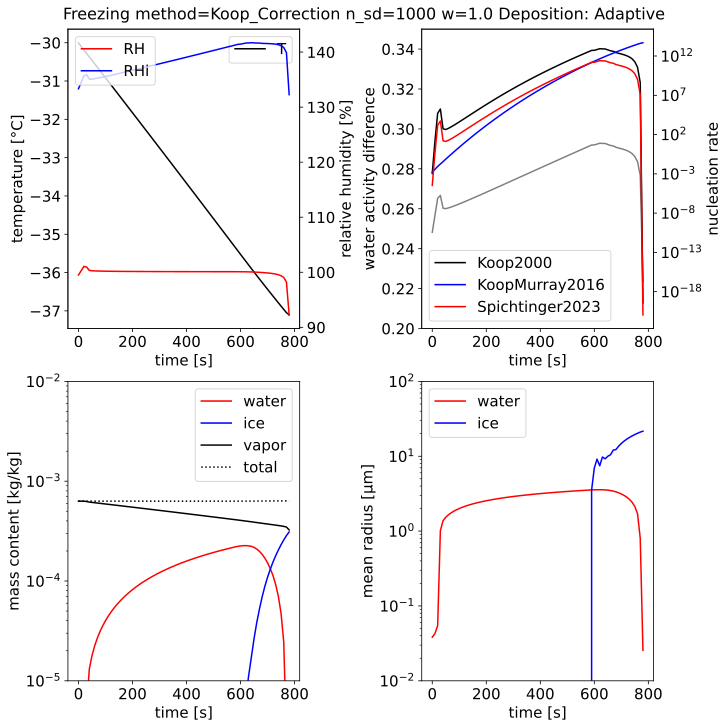

In [4]:
""" Testing deposition  """
setting_dict = {
            **standard,
            "n_sd": 1000,
            "backend": backends["Koop_Correction"],
            "hom_freezing": "Koop_Correction",
            "deposition_enable": False,
            "deposition_adaptive": False,
            }
simulation = run_simulations(setting_dict)
plot.plot_thermodynamics_and_bulk(simulation, title_add = " Deposition: False")
show_plot()

setting_dict = {
            **standard,
            "n_sd": 1000,
            "backend": backends["Koop_Correction"],
            "hom_freezing": "Koop_Correction",
            "deposition_enable": True,
            "deposition_adaptive": False,
            }
simulation = run_simulations(setting_dict)
plot.plot_thermodynamics_and_bulk(simulation, title_add = " Deposition: True")
show_plot()

setting_dict = {
            **standard,
            "n_sd": 1000,
            "backend": backends["Koop_Correction"],
            "hom_freezing": "Koop_Correction",
            "deposition_enable": True,
            "deposition_adaptive": True,
            }
simulation = run_simulations(setting_dict)
plot.plot_thermodynamics_and_bulk(simulation, title_add = " Deposition: Adaptive")
show_plot()


In [4]:
""" Single reference simulation for threshold """

setting_dict = {
            **standard,
            "backend": backends["threshold"],
            "hom_freezing": "threshold",
            }
threshold_reference_simulation = run_simulations(setting_dict)

""" Simulations for n_sd ensemble """
nsd_ensemble_simulations =[]
number_of_nsd = (10, 100, 1000)
for hom_freezing_type in hom_freezing_types:
    for n_sd in number_of_nsd:
        setting_dict = {
            **standard,
            "n_sd": n_sd,
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 5,
            }
        nsd_ensemble_simulations.append( run_simulations(setting_dict) )



Setting up simulation for threshold with wpdraft=1.0 and n_sd=100 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=100 and

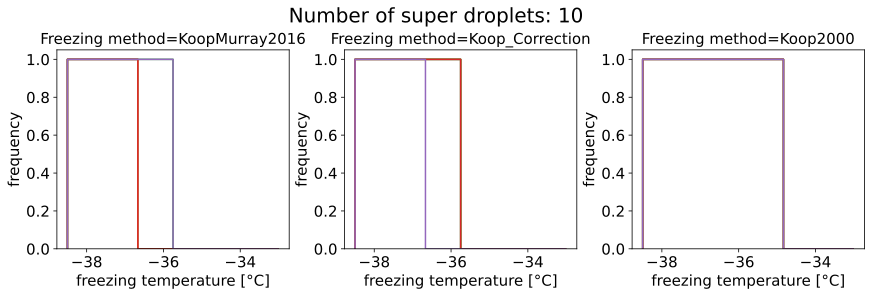

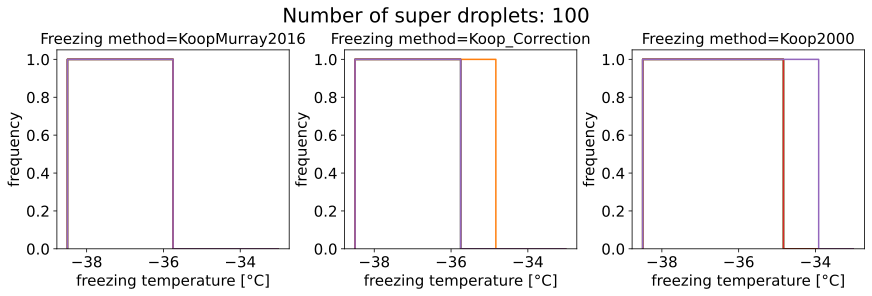

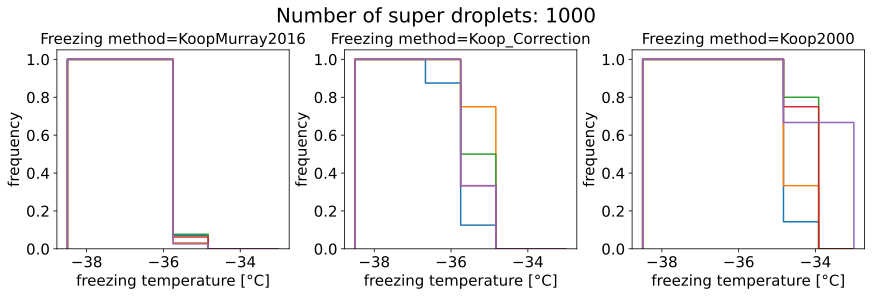

In [6]:
for n_sd in number_of_nsd:
    fig, axs = pyplot.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
    fig.suptitle("Number of super droplets: {}".format(n_sd),fontsize=20)
    axs = axs.ravel()
    i = 0
    for simulation in nsd_ensemble_simulations:
        if simulation["settings"]["n_sd"] == n_sd and simulation["settings"]["w_updraft"] == standard["w_updraft"]:
            axs[i] = plot.plot_freezing_temperatures_histogram(axs[i], simulation)
            i += 1
    show_plot()

In [7]:
""" Simulations for updraft histogram  """
simulations_updraft_ensemble = []
vertical_updrafts = np.geomspace(0.1,10,num=10)

for hom_freezing_type in hom_freezing_types:
    for updraft in vertical_updrafts:
        setting_dict = {
            **standard,
            "w_updraft": updraft  * si.meter / si.second,
            "n_sd": 1000,
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            }

        simulations_updraft_ensemble.append( run_simulations(setting_dict) )

Setting up simulation for KoopMurray2016 with wpdraft=0.1 and n_sd=1000 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=0.16681005372000587 and n_sd=1000 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=0.2782559402207124 and n_sd=1000 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=0.46415888336127786 and n_sd=1000 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=0.774263682681127 and n_sd=1000 and n_dv=849999999.9999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.291549665014884 and n_sd=1000 and n_dv=849999999.9999999
Starting simulation...
all particles froz

KeyboardInterrupt: 

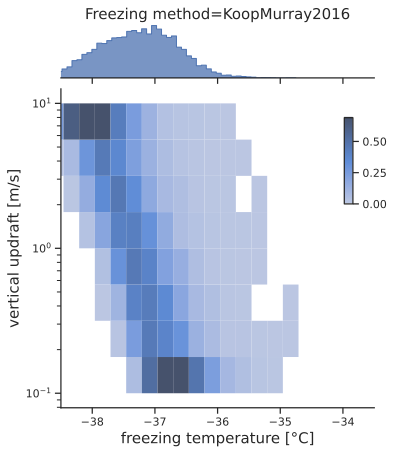

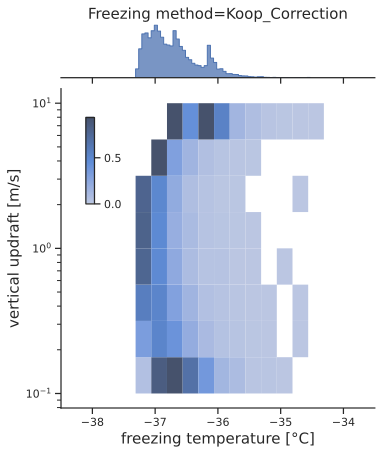

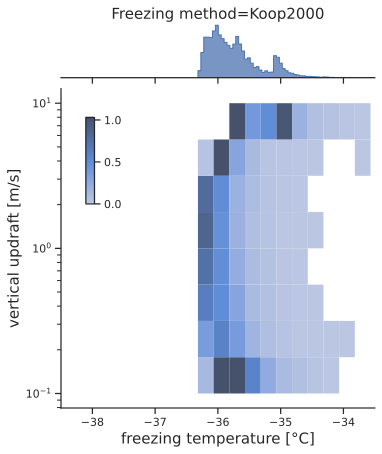

In [5]:
histogram_data_dict = {}

for hom_freezing_type in hom_freezing_types:

    sub_dict = {}
    histogram_data_dict[hom_freezing_type] = sub_dict

    sub_dict["T_frz_histogram_list"] = []
    sub_dict["w_updraft_histogram_list"] = []

    for i, updraft in enumerate(vertical_updrafts):
        for simulation in simulations_updraft_ensemble:
            if (simulation["settings"]["w_updraft"] == updraft
                    and simulation["settings"]["hom_freezing"] == hom_freezing_type):
                output = simulation["ensemble_member_outputs"][0]
                T_frz = output["T_frz"][-1]
                sub_dict["T_frz_histogram_list"].extend( T_frz )
                sub_dict["w_updraft_histogram_list"].extend( np.full_like(T_frz, updraft) )

plot.plot_freezing_temperatures_2d_histogram_seaborn(histogram_data_dict)
show_plot() # Does need to be inside the plot function?

In [33]:
""" Simulations for CCN concentration histogram  """
simulations_ccn_concentration_ensemble = []
number_concentrations = np.geomspace(100,20000,num=10) / si.cm**3

for hom_freezing_type in hom_freezing_types:
    for n_dv in number_concentrations:
        setting_dict = {
            **standard,
            "n_sd": 1000,
            "N_dv_droplet_distribution":  n_dv,
            "T0": formulae.trivia.C2K(-30),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            }
        simulations_ccn_concentration_ensemble.append( run_simulations(setting_dict) )

Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=1000 and n_dv=99999999.99999999
Starting simulation...
all particles frozen
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=1000 and n_dv=180164823.06544116
Starting simulation...
all particles frozen
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=1000 and n_dv=324593634.7020169
Starting simulation...
all particles frozen
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=1000 and n_dv=584803547.6425728
Starting simulation...
all particles frozen
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=1000 and n_dv=1053610276.8906642
Starting simulation...
all particles frozen
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=1000 and n_dv=1898235091.1593704
Starting simulation...
all particles frozen
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=1000 and n_dv=3419951893.3533926
Starting simulation...
all particles fr

[  100.           180.16482307   324.5936347    584.80354764
  1053.61027689  1898.23509116  3419.95189335  6161.55027758
 11100.9461557  20000.        ]
1898235091.1593704
234.85682044813294 235.65844701093948 237.0860931010646
1898235091.1593704
235.49552702536855 235.88383353542503 237.81443637748757
1898235091.1593704
236.49071428832025 236.85292828305055 238.60832955277297


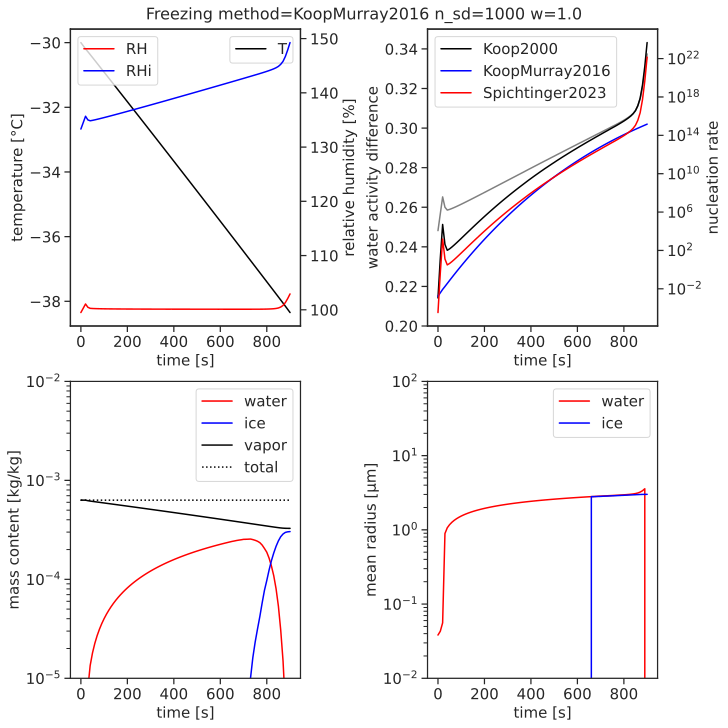

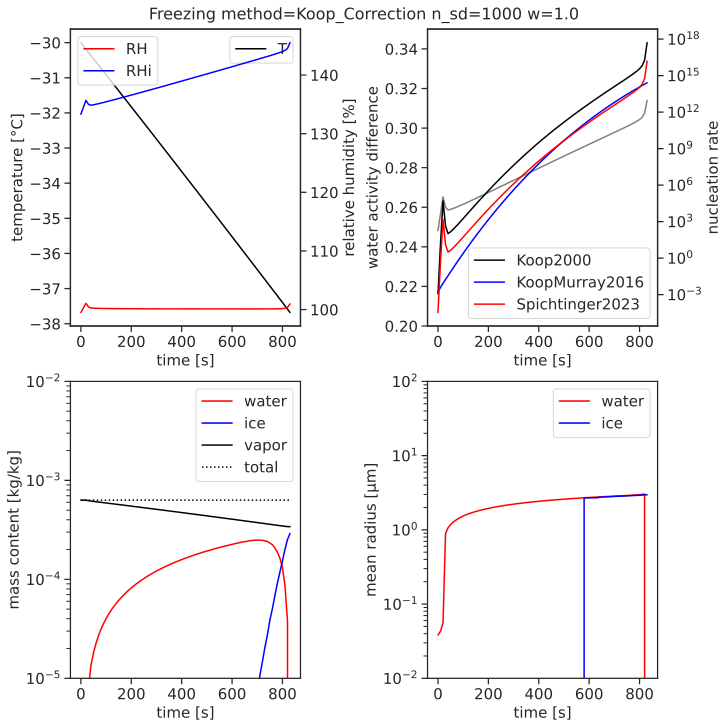

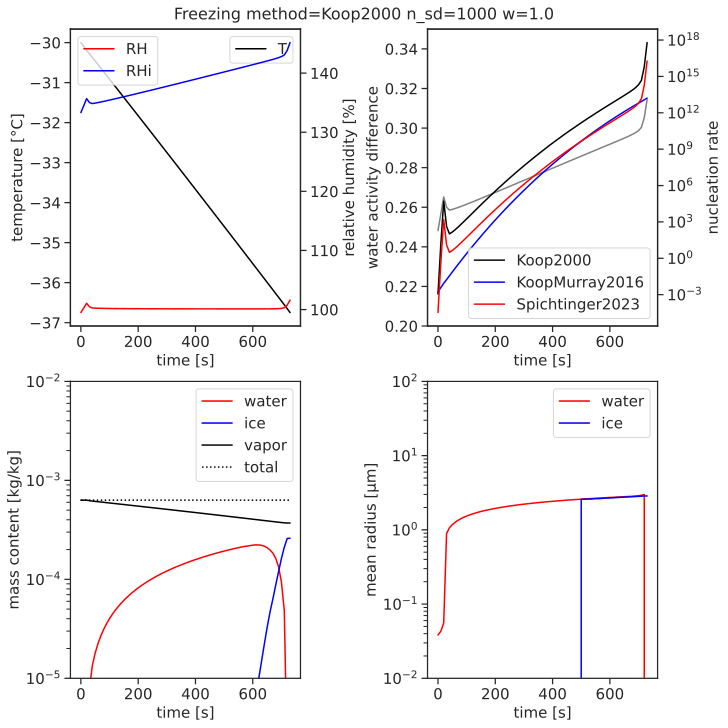

In [34]:
j = 5
print( number_concentrations * si.cm**3 )
for simulation in simulations_ccn_concentration_ensemble:

     if simulation["settings"]["N_dv_droplet_distribution"] == number_concentrations[j]:
         print( simulation["settings"]["N_dv_droplet_distribution"] )
         plot.plot_thermodynamics_and_bulk(simulation)
         T_frz_sub = simulation["ensemble_member_outputs"][0]["T_frz"][-1]
         print(np.amin(T_frz_sub), np.mean(T_frz_sub), np.amax(T_frz_sub))

KoopMurray2016 99999999.99999999 235.88920737339015 236.56460241056786 238.05133405035716
KoopMurray2016 180164823.06544116 235.68204221792232 236.37852250186486 237.87546385277543
KoopMurray2016 324593634.7020169 235.34978643119317 236.2153384393302 238.36240858971325
KoopMurray2016 584803547.6425728 235.25493788278936 236.02956913626969 237.80102924600453
KoopMurray2016 1053610276.8906642 235.08638655148738 235.83352608267535 237.83944409613432
KoopMurray2016 1898235091.1593704 234.85682044813294 235.65844701093948 237.0860931010646
KoopMurray2016 3419951893.3533926 234.59559802870808 235.46195303698445 237.3727196349284
KoopMurray2016 6161550277.583339 234.46635547427354 235.28451738389035 237.05815484801158
KoopMurray2016 11100946155.696224 234.18601663668488 235.07512233607744 237.27658606572285
KoopMurray2016 19999999999.999996 233.9709832572698 234.84623345378833 237.39686796046726
Koop_Correction 99999999.99999999 237.14912327001105 237.37790219386167 238.95817101073308
Koop_Co

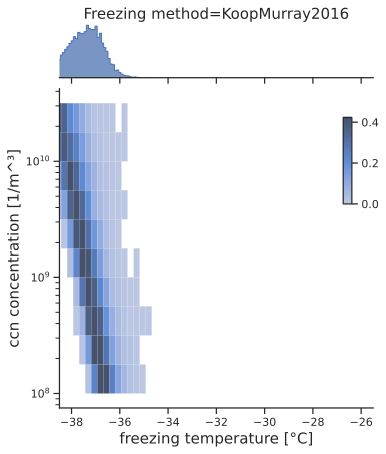

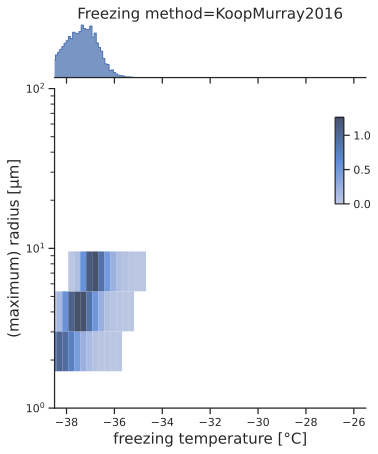

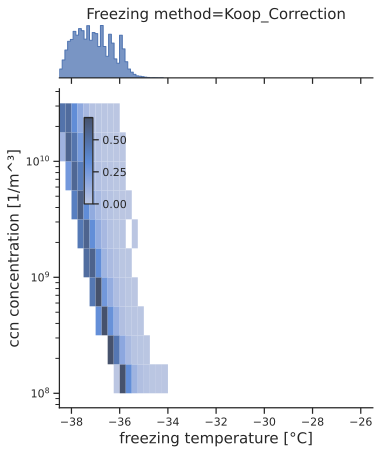

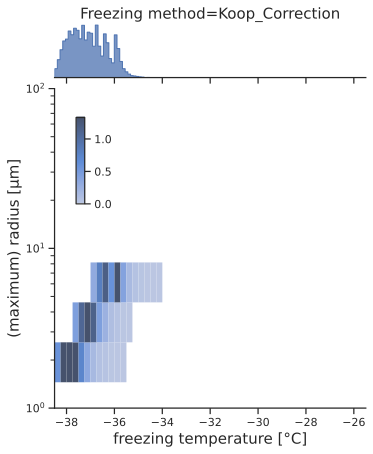

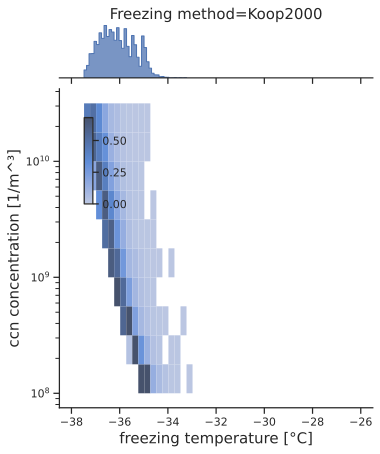

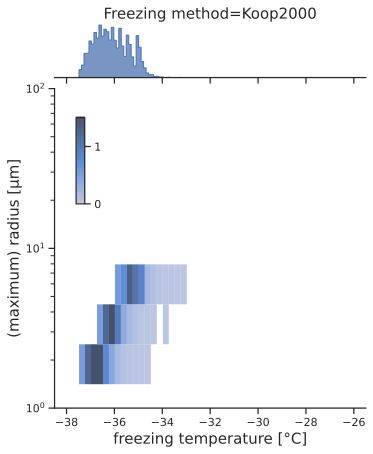

In [35]:
reload(plot)
histogram_data_ccn_concentration_ensemble = {}

for hom_freezing_type in hom_freezing_types:

    sub_dict = {}
    histogram_data_ccn_concentration_ensemble[hom_freezing_type] = sub_dict

    sub_dict["T_frz_histogram_list"] = []
    sub_dict["n_ccn_histogram_list"] = []
    sub_dict["rc_max_histogram_list"] = []

    for n_ccn in number_concentrations:
        for simulation in simulations_ccn_concentration_ensemble:
            if (simulation["settings"]["hom_freezing"] == hom_freezing_type
                    and simulation["settings"]["N_dv_droplet_distribution"] == n_ccn):
                output = simulation["ensemble_member_outputs"][0]
                T_frz = np.asarray(output["T_frz"][-1])
                print(hom_freezing_type, n_ccn, np.amin(T_frz), np.mean(T_frz), np.amax(T_frz))
                rc = np.asarray(output["rs"])
                sub_dict["T_frz_histogram_list"].extend( T_frz )
                sub_dict["n_ccn_histogram_list"].extend( np.full_like(T_frz, n_ccn) )
                sub_dict["rc_max_histogram_list"].extend( np.full_like(T_frz, np.amax(rc)) )

plot.plot_freezing_temperatures_2d_histogram_seaborn(histogram_data_ccn_concentration_ensemble)
show_plot() # Does need to be inside the plot function?